In [23]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

import os
import sys
import json
import importlib

import chess_board_processing as proc

importlib.reload(proc);

In [24]:
sys.path.insert(1, "../python-chess")
import chess

In [25]:
games_json = {}

with open(os.path.join("..", "dataset", "games.json")) as file:
    games_json = json.load(file)

In [26]:
games_json["1"]

{'White': 'Carlsen,',
 'Black': 'Nakamura,',
 'moves': {'1': 'e4 c5',
  '2': 'Nf3 d6',
  '3': 'Bb5+ Bd7',
  '4': 'Bxd7+ Nxd7',
  '5': 'O-O Ngf6',
  '6': 'd3 e6',
  '7': 'Ng5 Be7',
  '8': 'f4 O-O',
  '9': 'c4 Nb8',
  '10': 'Nc3 Nc6',
  '11': 'Be3 d5',
  '12': 'Bf2 h6',
  '13': 'Nf3 dxe4',
  '14': 'dxe4 e5',
  '15': 'f5 Re8',
  '16': 'Re1 Nd4',
  '17': 'Nxe5 Bd6',
  '18': 'Nf3 Ng4',
  '19': 'h3 Nxf2',
  '20': 'Kxf2 Qb6',
  '21': 'b3 Nxf3',
  '22': 'Qxf3 Be5',
  '23': 'Nd5 Qa5',
  '24': 'Rad1 Qxa2+',
  '25': 'Re2 Qa5',
  '26': 'f6 Re6',
  '27': 'fxg7 Rae8',
  '28': 'Kg1 Rg6',
  '29': 'Rf1 Rxg7',
  '30': 'Kh1 Qd8',
  '31': 'Qe3 Qd6',
  '32': 'Rf5 Qg6',
  '33': 'Qf3 Re6',
  '34': 'Rd2 Kh7',
  '35': 'Rxe5',
  'result': '1-0'}}

In [25]:
def next_move_up(game, up):
    return [games_json[game]["moves"][str(i)].split() for i in range(1, up + 1)]

def next_move(i):
    return games_json["1"]["moves"][i].split()

In [7]:
for i, game in games_json.items():
    moves = next_move_up(i, len(game["moves"].keys()) - 1)
    board = chess.Board()
    for move in moves:
        board.push_san(move[0])
        if len(move) == 2:
            board.push_san(move[1])

### Now lets create a dataset for ML model.

In [27]:
board = chess.Board()

r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . N . .
P P P P . P P P
R N B Q K B . R


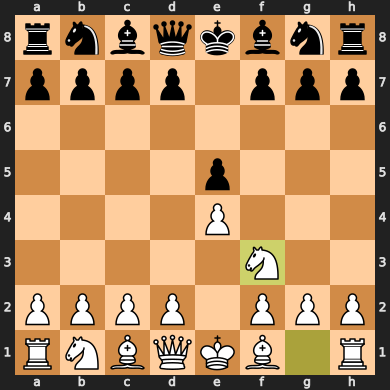

In [28]:
board.push_san("e4")
board.push_san("e5")
board.push_san("Nf3")
print(board)
board

In [29]:
b_array = proc.input_to_board(proc.board_to_input(board))
b_array

array([['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
       ['p', 'p', 'p', 'p', '.', 'p', 'p', 'p'],
       ['.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', 'p', '.', '.', '.'],
       ['.', '.', '.', '.', 'P', '.', '.', '.'],
       ['.', '.', '.', '.', '.', 'N', '.', '.'],
       ['P', 'P', 'P', 'P', '.', 'P', 'P', 'P'],
       ['R', 'N', 'B', 'Q', 'K', 'B', '.', 'R']], dtype='<U1')

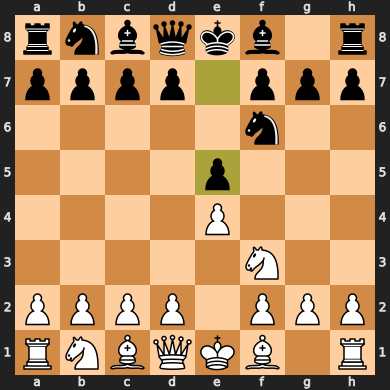

In [30]:
board = chess.Board()
# board.push_uci("g1f3")
board.push_san("Nf3")
board.push_san("Nf6")
board.push_san("e4")
board.push_san("e5")
board

In [31]:
board.move_stack

[Move.from_uci('g1f3'),
 Move.from_uci('g8f6'),
 Move.from_uci('e2e4'),
 Move.from_uci('e7e5')]

In [32]:
proc.board_pos_to_num_pos("f3"), proc.num_pos_to_board_pos(proc.board_pos_to_num_pos("f8"))

(array([5, 5]), 'f8')

In [33]:
proc.move_to_output(b_array, "d1e5")

array([7., 3., 3., 4.])

In [34]:
proc.unique_figures

array(['Q', 'P', 'K', 'R', 'N', 'B'], dtype='<U1')

**Take only games where Carlsen played with white.**

In [35]:
len(games_json.keys())

23171

In [19]:
carlsen_white_games = {}

for k, v in games_json.items():
    if "Carlsen" in v["White"]:
        carlsen_white_games[k] = v

In [15]:
len(carlsen_white_games.keys())

1013

In [37]:
len(games_json.keys())

23171

In [39]:
input_data = []
output_data = []

for k, v in games_json.items():
    board = chess.Board()
    for i in v["moves"]:
        if i == "result":
            continue
        moves = v["moves"][i].split()
        inp = proc.board_to_input(board)
        if not inp in input_data:
            input_data.append(inp)
            move_uci = board.parse_san(moves[0])
#             print(inp)

            output_pair = proc.move_to_output(proc.input_to_board(inp), str(move_uci)).astype(np.int8)
        
            output_data.append(output_pair)
        board.push_san(moves[0])
        if len(moves) == 2:
            board.push_san(moves[1])
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964


KeyboardInterrupt: 

In [41]:
len(input_data)

69986

In [21]:
input_data = np.array(input_data)
output_data = np.array(output_data)

In [25]:
output_data

array([[6, 4, 4, 4]], dtype=int8)

In [46]:
# X = []
# y = []

# for i in range(len(counts))[:10]:
#     if counts[i] > 1:
#         match_indicies = np.where(input_data == input_data[i])
#         X.append(input_data[match_indicies[:1]])
#         y.append(output_data[match_indicies[:1]])
#         print(match_indicies)
#     else:
#         X.append(input_data[i])
#         y.append(output_data[i])

(array([     0,      0,      0, ..., 970730, 970730, 970730]), array([ 0,  1,  3, ..., 60, 62, 63]))


In [28]:
proc.input_to_board(input_data[145]), output_data[145]

(array([['.', 'r', 'q', '.', '.', '.', 'k', '.'],
        ['Q', 'b', '.', '.', '.', '.', 'b', '.'],
        ['.', '.', 'p', '.', '.', '.', '.', '.'],
        ['.', '.', '.', 'n', 'p', '.', 'N', '.'],
        ['.', '.', 'B', '.', '.', '.', '.', '.'],
        ['.', 'P', '.', '.', '.', 'P', '.', '.'],
        ['P', '.', 'P', '.', '.', '.', '.', '.'],
        ['.', 'K', '.', 'R', '.', '.', '.', '.']], dtype='<U1'),
 array([7, 3, 7, 6], dtype=int8))

In [ ]:
!jt -r

In [26]:
# output_data[:1]

In [42]:
# output_data = output_data.reshape(output_data.shape[0], 8*4)
output_data.shape

(970731, 4)

In [592]:
input_data = input_data / input_data.max()
output_data = output_data / output_data.max()

In [43]:
input_data, output_data

(array([[12,  9,  7, ...,  1,  3,  6],
        [12,  9,  7, ...,  1,  3,  6],
        [12,  9,  7, ...,  1,  0,  6],
        ...,
        [ 0, 12,  0, ...,  0,  2,  0],
        [ 0, 12,  0, ...,  0,  2,  0],
        [ 0,  3,  0, ...,  0,  2,  0]]),
 array([[6, 4, 4, 4],
        [7, 6, 5, 5],
        [7, 5, 3, 1],
        ...,
        [3, 4, 2, 2],
        [2, 2, 0, 1],
        [3, 6, 6, 3]], dtype=int8))

In [21]:
input_data, output_data = None, None

### Process data

In [42]:
import pickle

with open("../dataset/input.pickle", "rb") as file:
    input_data = pickle.load(file)

with open("../dataset/output.pickle", "rb") as file:
    output_data = pickle.load(file)

In [43]:
input_data, output_data, input_data.shape, output_data.shape

(array([[12,  9,  7, ...,  1,  3,  6],
        [12,  9,  7, ...,  1,  3,  6],
        [12,  9,  7, ...,  1,  0,  6],
        ...,
        [ 0, 12,  0, ...,  0,  2,  0],
        [ 0, 12,  0, ...,  0,  2,  0],
        [ 0,  3,  0, ...,  0,  2,  0]]),
 array([[6, 4, 4, 4],
        [7, 6, 5, 5],
        [7, 5, 3, 1],
        ...,
        [3, 4, 2, 2],
        [2, 2, 0, 1],
        [3, 6, 6, 3]], dtype=int8),
 (970731, 64),
 (970731, 4))

In [4]:
data, counts = np.unique(input_data, return_counts=True, axis=0)

In [46]:
a = list(input_data)

TypeError: unhashable type: 'numpy.ndarray'

In [5]:
counts[9], np.where(input_data == data[9]), counts.shape

(2,
 (array([     0,      0,      0, ..., 970730, 970730, 970730]),
  array([16, 17, 18, ..., 58, 60, 63])),
 (728829,))

In [16]:
match_indicies = np.where(input_data == data[0])[1]
match_indicies

array([16, 17, 18, ..., 57, 58, 60])

In [22]:
data[match_indicies[2]].reshape(8, 8)

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0],
       [ 6,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  8,  0]])

In [48]:
with open("../dataset/short_input.pickle", "w") as inp:
    with open("../dataset/short_output.pickle", "w") as out:
        for i in range(len(counts)):
            print(i)
            if counts[i] > 1:
                match_indicies = np.where(np.all(np.where(input_data == data[i]), axis=1))[0]
                np.savetxt(inp, input_data[match_indicies[:1]])
                np.savetxt(out, output_data[match_indicies[:1]])
            else:
                np.savetxt(inp, input_data[i])
                np.savetxt(out, output_data[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222


KeyboardInterrupt: 

In [13]:
np.linspace(1, 728829, 3)

array([1.00000e+00, 3.64415e+05, 7.28829e+05])

In [38]:
# with open("../dataset/my_data.pickle", "wb") as file:
#     pickle.dump(np.arange(1, 10), file, protocol=pickle.HIGHEST_PROTOCOL)
#     pickle.dump(np.arange(1, 10), file, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
with open("../dataset/my_data.pickle", "rb") as file:
    print(pickle.load(file))

[1 2 3 4 5 6 7 8 9]


In [41]:

    np.savetxt(file, np.arange(1, 10))

In [42]:
with open("../dataset/my_data.pickle", "r") as file:
    print(np.loadtxt(file).reshape())

[1. 2. 3. 4. 5. 6. 7. 8. 9. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
